In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.7.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Data Exploration

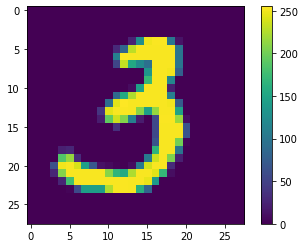

In [7]:
plt.figure()
plt.imshow(X_train[675])
plt.colorbar()
plt.show()

In [8]:
X_train = X_train/255.0

In [9]:
X_test = X_test/255.0

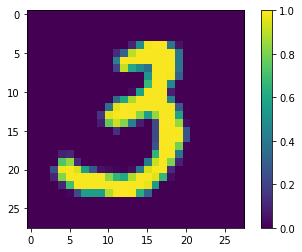

In [10]:
plt.figure()
plt.imshow(X_train[675])
plt.colorbar()
plt.show()

### Building the model with TF

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [12]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(180, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 180)               141300    
                                                                 
 dense_1 (Dense)             (None, 10)                1810      
                                                                 
Total params: 143,110
Trainable params: 143,110
Non-trainable params: 0
_________________________________________________________________


### Model Compilation

In [14]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 5000)

Epoch 1/10
12/12 [==============================] - 1s 57ms/step - loss: 1.5917 - accuracy: 0.6141
Epoch 2/10
12/12 [==============================] - 1s 61ms/step - loss: 0.6925 - accuracy: 0.8387
Epoch 3/10
12/12 [==============================] - 1s 57ms/step - loss: 0.4484 - accuracy: 0.8792
Epoch 4/10
12/12 [==============================] - 1s 58ms/step - loss: 0.3633 - accuracy: 0.8984
Epoch 5/10
12/12 [==============================] - 1s 63ms/step - loss: 0.3182 - accuracy: 0.9107
Epoch 6/10
12/12 [==============================] - 1s 67ms/step - loss: 0.2888 - accuracy: 0.9192
Epoch 7/10
12/12 [==============================] - 1s 62ms/step - loss: 0.2673 - accuracy: 0.9257
Epoch 8/10
12/12 [==============================] - 1s 55ms/step - loss: 0.2493 - accuracy: 0.9313
Epoch 9/10
12/12 [==============================] - 1s 47ms/step - loss: 0.2343 - accuracy: 0.9346
Epoch 10/10
12/12 [==============================] - 1s 48ms/step - loss: 0.2211 - accuracy: 0.9391


In [16]:
model.evaluate(X_test, Y_test , batch_size=5000)

2/2 [==============================] - 0s 42ms/step - loss: 0.2146 - accuracy: 0.9401


[0.21456418931484222, 0.9401000142097473]

### Lets do some predictions

In [17]:
pred = model.predict(X_test)

In [18]:
pred

array([[1.15584415e-04, 3.78995111e-07, 3.50144255e-04, ...,
        9.96405721e-01, 4.02385012e-05, 7.30921864e-04],
       [7.25270773e-04, 2.07890291e-04, 9.85603333e-01, ...,
        1.14381251e-08, 1.76016148e-03, 5.06938029e-08],
       [3.67756555e-04, 9.68510449e-01, 8.66824389e-03, ...,
        6.14250125e-03, 6.02361932e-03, 8.68153817e-04],
       ...,
       [2.97293536e-06, 4.81875350e-06, 3.02330391e-05, ...,
        1.79394777e-03, 7.72967376e-03, 3.51042859e-02],
       [9.04434200e-05, 1.53192868e-05, 5.64096308e-06, ...,
        2.16712874e-06, 2.93098064e-03, 5.43252872e-06],
       [1.26708064e-05, 1.93793159e-09, 3.31622796e-05, ...,
        2.91090596e-09, 2.74198840e-07, 1.66415894e-08]], dtype=float32)

In [19]:
np.argmax(pred[0])

7

In [20]:
np.argmax(pred[1])

2

In [23]:
def do_prediction(i):
    
    plt.figure()
    plt.imshow(X_test[i])
    plt.colorbar()
    plt.show()
    
    print(np.argmax(pred[i]), 'is the number above.')
    return

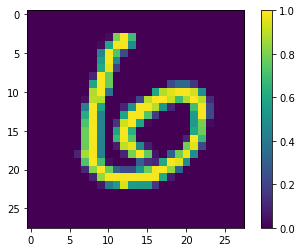

6 is the number above.


In [24]:
do_prediction(11)